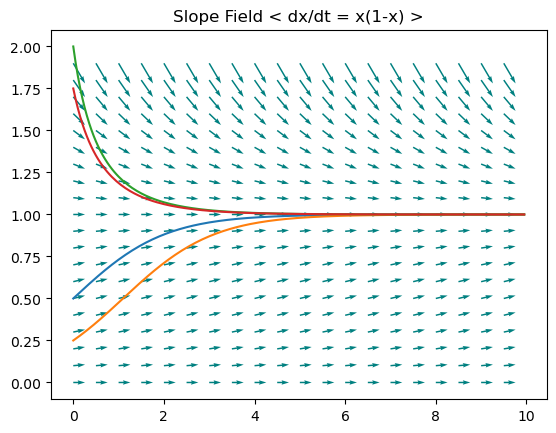

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Strogatz, Nonlinear Dynamics and Chaos, pg 33-34

# 4th order Runge Kutta numerical approximation
def runge_kutta_4(dydx, range=(0,10), step=0.1, init_val=0.0):

    cur_val = init_val    
    res = []
    for i in np.arange(range[0], range[1], step):
        res.append(cur_val)
        k1 = dydx(cur_val) * step
        k2 = dydx(cur_val + 0.5*k1) * step
        k3 = dydx(cur_val + 0.5*k2) * step
        k4 = dydx(cur_val + k3) * step
        cur_val += (k1 + 2*k2 + 2*k3 + k4) / 6.0
    
    return res

# code below adapted from https://medium.com/@olutosinbanjo/how-to-plot-a-direction-field-with-python-1fd022e2d8f8

def gen_meshgrid(x_interval=[-3,3], y_interval=[-3,3]):
    x = np.arange(x_interval[0], x_interval[1], (x_interval[1] - x_interval[0]) / 20.0)
    y = np.arange(y_interval[0], y_interval[1], (y_interval[1] - y_interval[0]) / 20.0)
    return np.meshgrid(x, y)

def gen_slopevals(X, Y, dydx):
    dy = dydx(Y)
    dx = np.ones(dy.shape)
    return (dy, dx)

def plot_slope_field_prepped(x_ticks, y_ticks, x_vals, y_vals, normalized=True, title="Slope Field", extra_x=[]):

    if normalized:
        x_vals = x_vals / np.sqrt(x_vals**2 + y_vals**2)
        y_vals = y_vals / np.sqrt(x_vals**2 + y_vals**2)

    plot = plt.figure()
    plt.quiver(x_ticks, y_ticks, x_vals, y_vals, 
               color='Teal')
    for y in extra_x: # TODO rename or probably rework API
        plt.plot(y[0], y[1])

    plt.title(title)
    plt.show(plot)

    return plt

def plot_slope_field(x_interval, y_interval, dydx, normalized=True, title="Slope Field", extra_x=[]):
    X, Y = gen_meshgrid(x_interval, y_interval)
    dy, dx = gen_slopevals(X, Y, dydx)
    return plot_slope_field_prepped(X, Y, dx, dy, normalized=normalized, title=title, extra_x=extra_x)

if __name__ == '__main__':
  
    def logistic_equation(X):
        return X * (1 - X)  
    x_interval = [0, 10]
    y_interval = [0,2]

    x = np.arange(0,10,0.05)
    y1 = runge_kutta_4(logistic_equation, step=0.05, init_val=0.5)
    y2 = runge_kutta_4(logistic_equation, step=0.05, init_val=0.25)
    y3 = runge_kutta_4(logistic_equation, step=0.05, init_val=2)
    y4 = runge_kutta_4(logistic_equation, step=0.05, init_val=1.75)
    extra_x = [[x, y1], [x, y2], [x, y3], [x, y4]]

    plt = plot_slope_field(x_interval, y_interval, logistic_equation, extra_x=extra_x, title='Slope Field < dx/dt = x(1-x) >')
    #axes = plt.gca()
    #axes.plot(x, y)
    #plt.show()